In [11]:
import os
import glob
import pandas as pd
import itertools

In [12]:
df = pd.read_csv("RollingSystemDemand_20211018_1847.csv")
print (df)

                HDR  ROLLING SYSTEM DEMAND
VD   20210901000000                22640.0
VD   20210901000500                22558.0
VD   20210901001000                22443.0
VD   20210901001500                22466.0
VD   20210901002000                22413.0
..              ...                    ...
VD   20210907222000                26087.0
VD   20210907222500                25904.0
VD   20210907223000                25669.0
VD   20210907223500                25536.0
FTR            2000                    NaN

[2001 rows x 2 columns]


In [13]:
df1 = pd.read_csv("RollingSystemDemand_20211018_1848.csv")
print (df1)

                HDR  ROLLING SYSTEM DEMAND
VD   20210908000000                23472.0
VD   20210908000500                23397.0
VD   20210908001000                23380.0
VD   20210908001500                23333.0
VD   20210908002000                23268.0
..              ...                    ...
VD   20210914222000                26233.0
VD   20210914222500                25996.0
VD   20210914223000                25818.0
VD   20210914223500                25734.0
FTR            2000                    NaN

[2001 rows x 2 columns]


In [14]:
df2 = pd.read_csv("RollingSystemDemand_20211018_1848.csv")
print (df2)

                HDR  ROLLING SYSTEM DEMAND
VD   20210908000000                23472.0
VD   20210908000500                23397.0
VD   20210908001000                23380.0
VD   20210908001500                23333.0
VD   20210908002000                23268.0
..              ...                    ...
VD   20210914222000                26233.0
VD   20210914222500                25996.0
VD   20210914223000                25818.0
VD   20210914223500                25734.0
FTR            2000                    NaN

[2001 rows x 2 columns]


In [15]:
#res = list(itertools.chain(df, df1, df2)) 
   
#print ("Concatenated list:\n " + str(res)) 


In [18]:
#all_filenames = [i for i in glob.glob(f"*{df, df1, df2}")]
#print(all_filenames)
#combined_csv = pd.concat([pd.read_csv(f) for f in  ])
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#Resource https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/

In [17]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
print(combined_csv.to_csv)


<bound method NDFrame.to_csv of                 HDR  ROLLING SYSTEM DEMAND
VD   20210901000000                22640.0
VD   20210901000500                22558.0
VD   20210901001000                22443.0
VD   20210901001500                22466.0
VD   20210901002000                22413.0
..              ...                    ...
VD   20210914222000                26233.0
VD   20210914222500                25996.0
VD   20210914223000                25818.0
VD   20210914223500                25734.0
FTR            2000                    NaN

[6003 rows x 2 columns]>


In [19]:
df = pd.read_csv('combined_csv.csv')
df['HDR'] = df['HDR'].apply(str)

In [23]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 6001
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HDR                    6000 non-null   object 
 1   ROLLING SYSTEM DEMAND  6000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.6+ KB


In [24]:
df['HDR'] = pd.to_datetime(df['HDR'], format='%Y%m%d%H%M%S')
# Resource https://datatofish.com/strings-to-datetime-pandas/ 

In [25]:
df

,HDR,ROLLING SYSTEM DEMAND
0,2021-09-01 00:00:00,22640.0
1,2021-09-01 00:05:00,22558.0
2,2021-09-01 00:10:00,22443.0
3,2021-09-01 00:15:00,22466.0
4,2021-09-01 00:20:00,22413.0
...,...,...
5997,2021-09-14 22:15:00,26415.0
5998,2021-09-14 22:20:00,26233.0
5999,2021-09-14 22:25:00,25996.0
6000,2021-09-14 22:30:00,25818.0


In [26]:
df['hr'] = df['HDR'].dt.hour
df
# Resource https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python/26105888

,HDR,ROLLING SYSTEM DEMAND,hr
0,2021-09-01 00:00:00,22640.0,0
1,2021-09-01 00:05:00,22558.0,0
2,2021-09-01 00:10:00,22443.0,0
3,2021-09-01 00:15:00,22466.0,0
4,2021-09-01 00:20:00,22413.0,0
...,...,...,...
5997,2021-09-14 22:15:00,26415.0,22
5998,2021-09-14 22:20:00,26233.0,22
5999,2021-09-14 22:25:00,25996.0,22
6000,2021-09-14 22:30:00,25818.0,22


In [33]:
df69 = df.groupby('hr').mean()
df69

,ROLLING SYSTEM DEMAND
hr,
0,22555.710317
1,22093.904762
2,21745.841270
3,21677.817460
4,22219.646825
5,24456.146825
6,27572.892857
7,29363.869048
8,29853.333333


In [34]:
x = list(df69.index)
y = df69['ROLLING SYSTEM DEMAND']

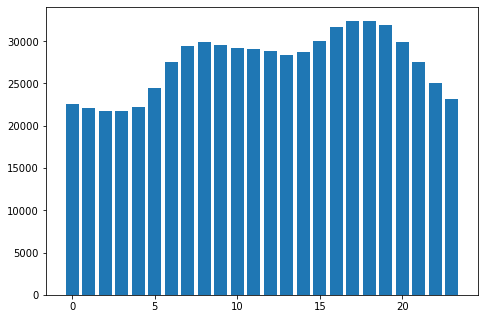

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()
# resource https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm 

In [52]:
df96 = df.groupby('HDR').mean()
df96

,ROLLING SYSTEM DEMAND,hr
HDR,,
2021-09-01 00:00:00,22640.0,0
2021-09-01 00:05:00,22558.0,0
2021-09-01 00:10:00,22443.0,0
2021-09-01 00:15:00,22466.0,0
2021-09-01 00:20:00,22413.0,0
...,...,...
2021-09-21 22:15:00,23823.0,22
2021-09-21 22:20:00,23641.0,22
2021-09-21 22:25:00,23382.0,22


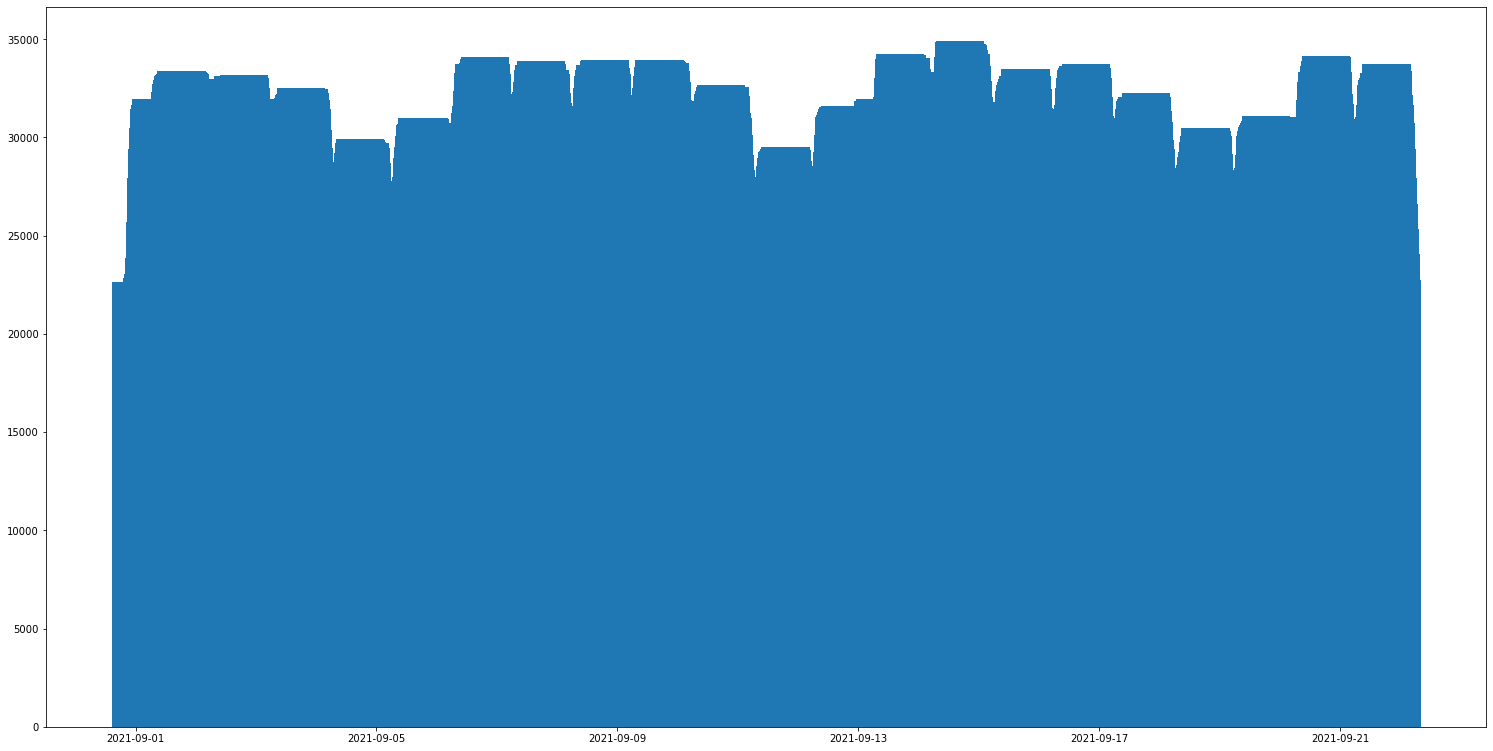

In [54]:
x = list(df96.index)
y = df96['ROLLING SYSTEM DEMAND']

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()